# Exercise 7

## K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [3]:
data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [4]:
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


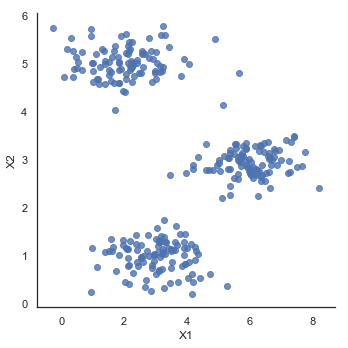

In [5]:
sb.set(context="notebook", style="white")
sb.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

In [6]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [7]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [8]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [9]:
idx, centroids = run_k_means(X, initial_centroids, 10)

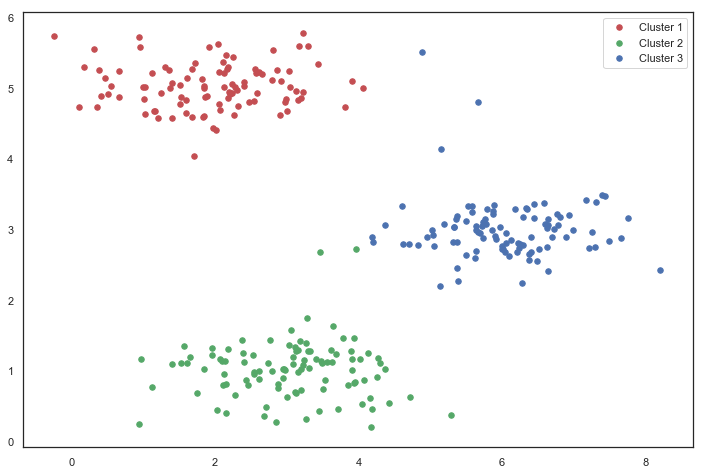

In [10]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

In [11]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [12]:
init_centroids(X, 3)

array([[2.26901428, 4.61818883],
       [0.37963437, 5.26194729],
       [2.66046572, 5.19623848]])

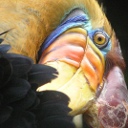

In [13]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [14]:
image_data = loadmat('data/bird_small.mat')
A = image_data['A']
A.shape

(128, 128, 3)

In [15]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [16]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [17]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

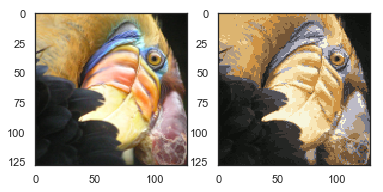

In [18]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(A)
ax[1].imshow(X_recovered)
plt.show()

## PCA

PCA是在数据集中找到“主成分”或最大方差方向的线性变换。 它可以用于降维。 

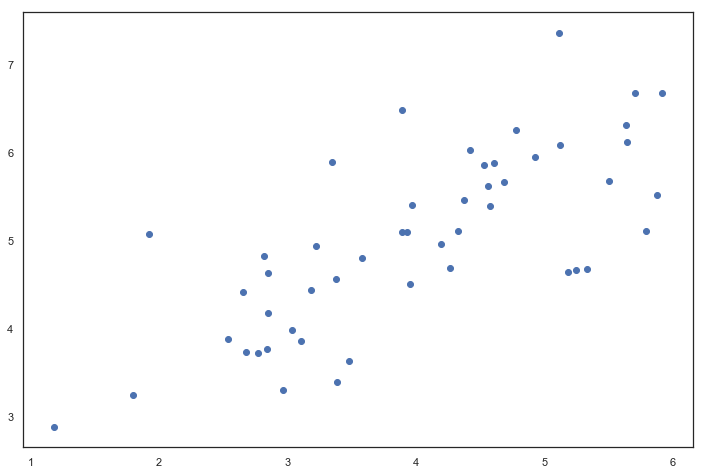

In [19]:
data = loadmat('data/ex7data1.mat')
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

In [20]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [21]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [22]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [23]:
Z = project_data(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [24]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [25]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

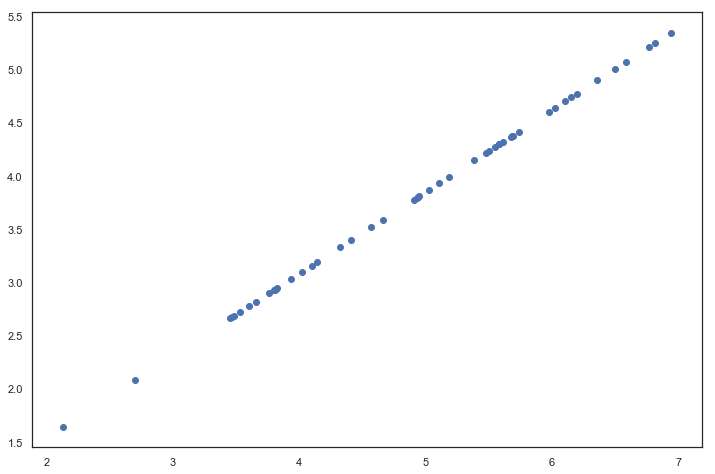

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

In [27]:
faces = loadmat('data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [28]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


In [29]:
face = np.reshape(X[3,:], (32, 32))

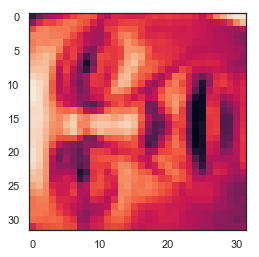

In [30]:
plt.imshow(face)
plt.show()

In [31]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

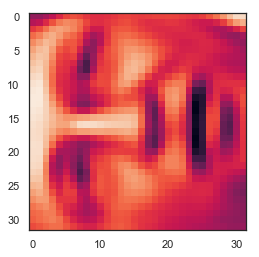

In [32]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)
plt.show()